# Assignment 7: Linear Model Selection and Regularization

Dataset(s) needed:
Kaggle House Prices (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

Libraries needed:
glmnet

Convert building class code (MSSubClass) to a factor.
For numeric NA values, impute by taking each column’s mean.
For non-numeric, apply an appropriate technique.



In [2]:
library("caret")
library("glmnet")
library(data.table)
library('mice')
data_url = "https://library.startlearninglabs.uw.edu/ML210/train.csv"
prices = fread(data_url, stringsAsFactors = T)
head(prices)
str(prices)
sapply(prices, function(x) sum(is.na(x)))
prices$MSSubClass <- as.factor(prices$MSSubClass)

which(sapply(prices, function(x) sum(is.na(x)) >0 && is.integer(x) == TRUE) == T)
prices$LotFrontage[which(is.na(prices$LotFrontage) == TRUE) ] <- 
  as.integer(mean(t(prices$LotFrontage), na.rm=T))
prices$MasVnrArea[which(is.na(prices$MasVnrArea) == TRUE) ] <- 
  as.integer(mean(t(prices$MasVnrArea), na.rm=T))
prices$GarageYrBlt[which(is.na(prices$GarageYrBlt) == TRUE) ] <- 
  as.integer(mean(t(prices$GarageYrBlt), na.rm=T))

which(sapply(prices, function(x) sum(is.na(x)) >0 ) == T)

mnames <- c( names(which(sapply(prices, function(x) sum(is.integer(x)) ==TRUE ) == T)) ,
    names(which(sapply(prices, function(x) sum(is.na(x)) >0 ) == T)))
set.seed(12321)
pricesDT <- as.data.table(prices)
mice_mod <- mice(pricesDT[,mnames,with=F], method='rf')
mice_output <- complete(mice_mod)

namanes <-names(which(sapply(prices, function(x) sum(is.na(x)) >0 ) == T))
prices[,namanes] <- as.data.table(mice_output[,namanes])


Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


Classes ‘data.table’ and 'data.frame':	1460 obs. of  81 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : Factor w/ 5 levels "C (all)","FV",..: 4 4 4 4 4 4 4 4 5 4 ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Alley        : Factor w/ 2 levels "Grvl","Pave": NA NA NA NA NA NA NA NA NA NA ...
 $ LotShape     : Factor w/ 4 levels "IR1","IR2","IR3",..: 4 4 1 1 1 1 4 1 4 4 ...
 $ LandContour  : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Utilities    : Factor w/ 2 levels "AllPub","NoSeWa": 1 1 1 1 1 1 1 1 1 1 ...
 $ LotConfig    : Factor w/ 5 levels "Corner","CulDSac",..: 5 3 5 1 3 5 5 1 5 1 ...
 $ LandSlope    : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood : Factor w/ 25 level

Id    MSSubClass      MSZoning   LotFrontage       LotArea 
            0             0             0           259             0 
       Street         Alley      LotShape   LandContour     Utilities 
            0          1369             0             0             0 
    LotConfig     LandSlope  Neighborhood    Condition1    Condition2 
            0             0             0             0             0 
     BldgType    HouseStyle   OverallQual   OverallCond     YearBuilt 
            0             0             0             0             0 
 YearRemodAdd     RoofStyle      RoofMatl   Exterior1st   Exterior2nd 
            0             0             0             0             0 
   MasVnrType    MasVnrArea     ExterQual     ExterCond    Foundation 
            8             8             0             0             0 
     BsmtQual      BsmtCond  BsmtExposure  BsmtFinType1    BsmtFinSF1 
           37            37            38            37             0 
 BsmtFinType2    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF       Heating 
           38             0             0             0             0 
    HeatingQC    CentralAir    Electrical      1stFlrSF      2ndFlrSF 
            0             0             1             0             0 
 LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath 
            0             0             0             0             0 
     HalfBath  BedroomAbvGr  KitchenAbvGr   KitchenQual  TotRmsAbvGrd 
            0             0             0             0             0 
   Functional    Fireplaces   FireplaceQu    GarageType   GarageYrBlt 
            0             0           690            81            81 
 GarageFinish    GarageCars    GarageArea    GarageQual    GarageCond 
           81             0             0            81            81 
   PavedDrive    WoodDeckSF   OpenPorchSF EnclosedPorch     3SsnPorch 
            0             0             0             0             0 
  ScreenPorch      PoolArea        PoolQC         Fence   MiscFeature 
            0             0          1453          1179          1406 
      MiscVal        MoSold        YrSold      SaleType SaleCondition 
            0             0             0             0             0 
    SalePrice 
            0

LotFrontage  MasVnrArea GarageYrBlt 
          4          27          60

Alley   MasVnrType     BsmtQual     BsmtCond BsmtExposure BsmtFinType1 
           7           26           31           32           33           34 
BsmtFinType2   Electrical  FireplaceQu   GarageType GarageFinish   GarageQual 
          36           43           58           59           61           64 
  GarageCond       PoolQC        Fence  MiscFeature 
          65           73           74           75


 iter imp variable
  1   1  Alley  MasVnrType  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  Electrical  FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCond  PoolQC  Fence  MiscFeature
  1   2  Alley  MasVnrType  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  Electrical  FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCond  PoolQC  Fence  MiscFeature
  1   3  Alley  MasVnrType  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  Electrical  FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCond  PoolQC  Fence  MiscFeature
  1   4  Alley  MasVnrType  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  Electrical  FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCond  PoolQC  Fence  MiscFeature
  1   5  Alley  MasVnrType  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  Electrical  FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCond  PoolQC  Fence  MiscFeature
  2   1  Alley  MasV

Partition the data into training and test sets.

In [3]:
set.seed(123)
idx <- sample(2, nrow(prices), replace=TRUE, prob=c(0.8, 0.2))
trainData <- prices[idx==1,]
testData <- prices[idx==2,]

## Lasso Regression

Fit lasso regression to training data, while choosing optimum value of regularization factor hyperparameter λ

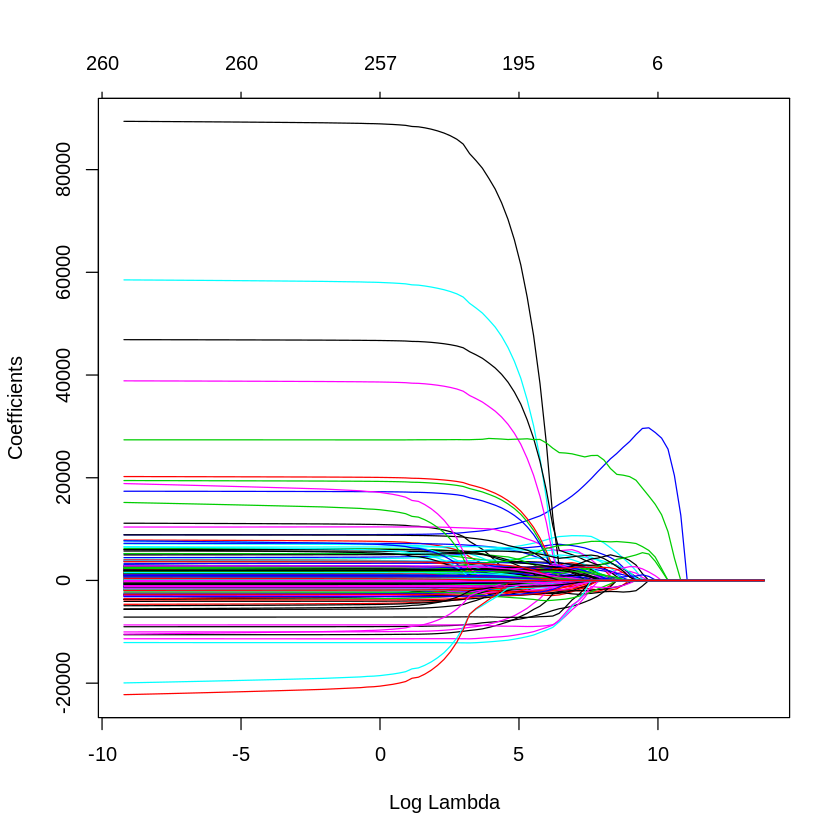

[1] 6309.573

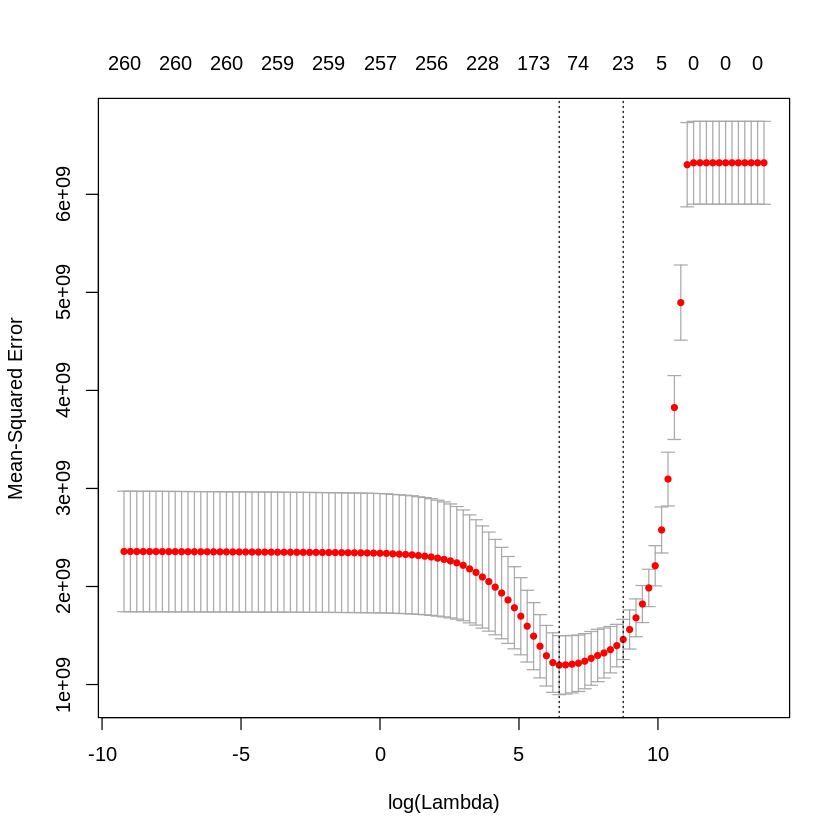

In [4]:
x <- model.matrix(~0+., prices[,setdiff(names(prices), c('SalePrice')),with=F])
x.std <- scale(x)
y <- sapply(prices$SalePrice, as.double)
lambda <- 10**(-40:60/10)
fit <- glmnet(x.std, y, alpha=1, lambda=lambda, standardize = T)
plot(fit, xvar="lambda")
fit.cv <- cv.glmnet(x.std,y, alpha=1, lambda=lambda)
plot(fit.cv)
fit.cv$lambda.1se

#Actually, as we do cross-validation here, that's why we use all data and not train-test.
# as we discussed at lectures, CV may be better as we use larger amount of observations.

How many columns has the model chosen?

In [5]:
newFit = glmnet(x.std, y, alpha=1, lambda=fit.cv$lambda.1se, standardize = T)
sum(coef(newFit) > 0)

[1] 20

Using t value, what are the most important variables according to your model?
To what extent does this match your intuition?

In [6]:
#Using t-value it is impossible to get most important variables. 
#T value only can show something about statistic significance, 
# so the question does not make much sense. As some of us found, 
# getting statistical signifacance test for Lasso is quite a new 
# research and it's quite unclear how to do it. 

## Ridge Regression

Perform ridge regression, while choosing optimum value of hyperparameter λ.

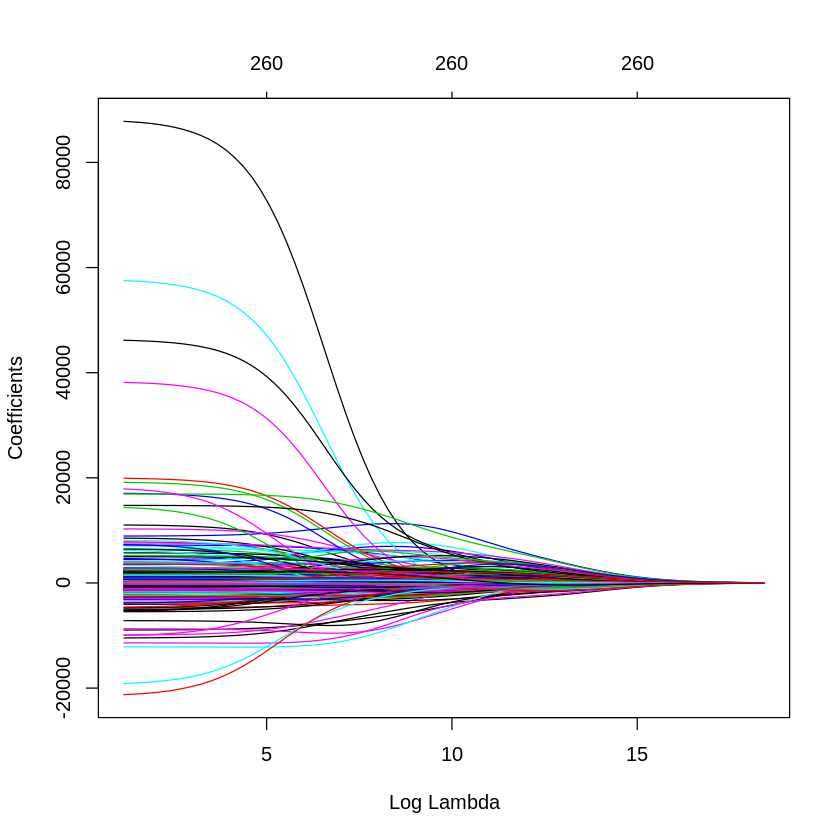

[1] 158489.3

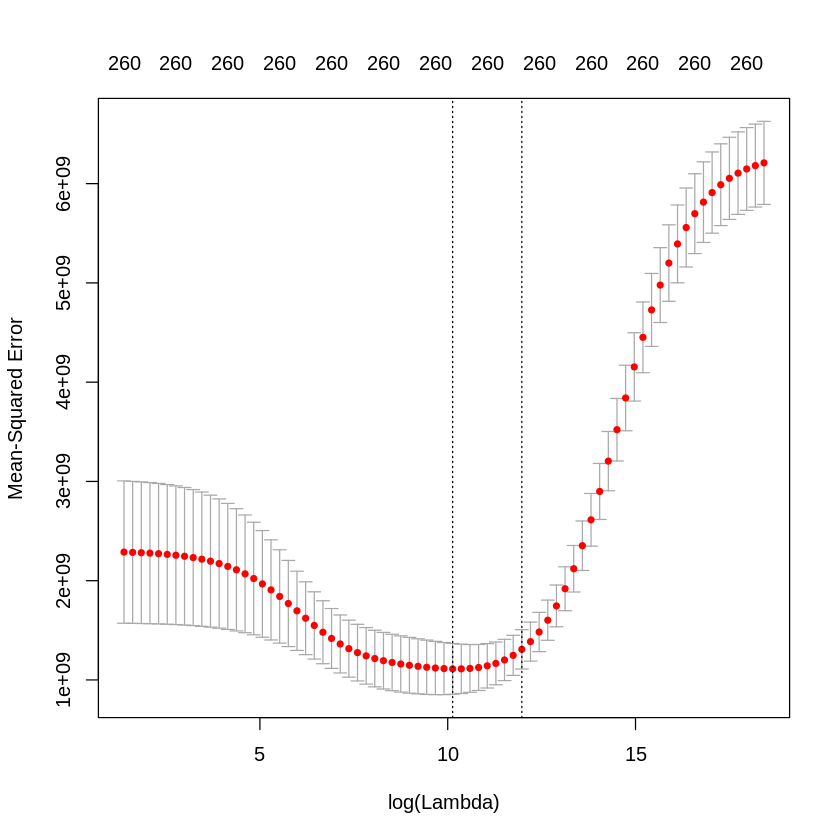

In [7]:
x <- model.matrix(~0+., prices[,setdiff(names(prices), c('SalePrice')),with=F])
x.std <- scale(x)
y <- sapply(prices$SalePrice, as.double)
lambda <- 10**(5:80/10)
fit <- glmnet(x.std, y, alpha=0, lambda=lambda, standardize = T)
plot(fit, xvar="lambda")
fit.cv <- cv.glmnet(x.std,y, alpha=0, lambda=lambda)
plot(fit.cv)
fit.cv$lambda.1se

#Actually, as we do cross-validation here, that's why we use all data and not train-test.
# as we discussed at lectures, CV may be better as we use larger amount of observations.

What is your mean squared error (MSE)?

In [8]:
idx <- which(fit.cv$lambda == fit.cv$lambda.1se)
mse <- fit.cv$cvm[idx]
mse

#found that cvm is the same as mse.

[1] 1308410466

## Elastic Net Regression

Perform elastic net regression. Use the caret library's feature for selecting the best value of α.


In [9]:
library(glmnet)
library(caret)
library(ISLR)

lambda <- 10**(-40:60/10)
alpha <- seq(0,1, length=10)
trControl <- trainControl(method = "cv", 10)
srchGrid <- expand.grid(.alpha=alpha, .lambda=lambda)
set.seed(12312)
x <- model.matrix(~0+., prices)
x.std <- scale(x)

my.train <- train(SalePrice~.,
                  data=x.std,
                  method="glmnet",
                  tuneGrid=srchGrid,
                  trControl=trControl,
                  maxit=100000)
attributes(my.train)
my.train$bestTune

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

$names
 [1] "method"       "modelInfo"    "modelType"    "results"      "pred"        
 [6] "bestTune"     "call"         "dots"         "metric"       "control"     
[11] "finalModel"   "preProcess"   "trainingData" "resample"     "resampledCM" 
[16] "perfNames"    "maximize"     "yLimits"      "times"        "levels"      
[21] "terms"        "coefnames"    "xlevels"     

$class
[1] "train"         "train.formula"

,alpha,lambda
130,0.1111111,0.06309573
